### IMPORT DATA

In [1]:
import pandas as pd
import numpy

In [2]:
df = pd.read_csv(r"C:\Users\buing\Downloads\fundamentalDS\phongvulaptop.csv")

In [3]:
df.dropna(axis=1, how='all', inplace=True)
df.columns

Index(['Product name', 'Price', 'Thương hiệu', 'Bảo hành', 'CPU', 'NPU',
       'Chip đồ họa', 'Màn hình', 'Webcam', 'Ram', 'Lưu trữ', 'Cổng kết nối',
       'Âm thanh', 'Kết nối không dây', 'Bàn phím', 'Hệ điều hành',
       'Kích thước', 'Pin', 'Khối lượng', 'Chất liệu', 'Bảo mật',
       'Đèn LED trên máy', 'Trong hộp có gì', 'Series laptop', 'Tên',
       'Part-number', 'Màu sắc', 'Nhu cầu', 'Mô tả bảo hành', 'Dung lượng RAM',
       'Dung lượng SSD', 'Cổng HDMI', 'Công suất pin',
       'Kích thước, khối lượng', 'Công nghệ âm thanh', 'Đèn laptop',
       'Phụ kiện đi kèm', 'Tính năng đặc biệt'],
      dtype='object')

In [4]:
# # Merge the specified columns into a new column
#df['Miêu tả'] = df[['Công nghệ âm thanh', 'Đèn laptop', 'Phụ kiện đi kèm', 'Tính năng đặc biệt', 'Mô tả bảo hành']].agg(lambda x: ' | '.join(x.dropna().astype(str)), axis=1)
#df = df.drop(columns = ['Công nghệ âm thanh', 'Đèn laptop', 'Phụ kiện đi kèm', 'Tính năng đặc biệt', 'Mô tả bảo hành'])

# DROP COLUMNS THAT HAVE TOO MANY NAN
threshold = 0.1 * len(df)  # 90% of the total number of rows

# Drop columns where NaN values exceed the threshold
df = df.dropna(axis=1, thresh=threshold)


## Preprocess duplicate columns

In [5]:
# Extract 'Kích thước' where it is NaN
mask_size = df['Kích thước'].isna()
df.loc[mask_size, 'Kích thước'] = df.loc[mask_size, 'Kích thước, khối lượng'].str.extract(r'\| (.+?) cm')[0]

# Extract 'Khối lượng' where it is NaN
mask_weight = df['Khối lượng'].isna()
df.loc[mask_weight, 'Khối lượng'] = df.loc[mask_weight, 'Kích thước, khối lượng'].str.extract(r'(\d+\.?\d*)\s*kg')[0]

# Fill NaN in 'Pin' with values from 'Công suât' where 'Pin' is NaN
df['Pin'].fillna(df['Công suất pin'], inplace=True)

df['Ram'].fillna(df['Dung lượng RAM'], inplace=True)

df['Lưu trữ'].fillna(df['Dung lượng SSD'], inplace=True)

# duplicate value of CPU information (drop 197 unique values/classes => 149)
mask_cpu = df['CPU'].notna()
df.loc[mask_cpu, 'CPU'] = df.loc[mask_cpu, 'CPU'].str.split(',').str[0]

C:\Users\buing\AppData\Local\Temp\ipykernel_9788\477194963.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pin'].fillna(df['Công suất pin'], inplace=True)
C:\Users\buing\AppData\Local\Temp\ipykernel_9788\477194963.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [6]:
df =df.drop(columns=['Kích thước, khối lượng', 'Công suất pin', 'Dung lượng RAM', 'Dung lượng SSD', 'Tên'])

In [7]:
# Count NaN values in each column
nan_counts = df.isna().sum()
print(nan_counts)

Product name           0
Price                  0
Thương hiệu            1
Bảo hành               5
CPU                    1
NPU                  549
Chip đồ họa           94
Màn hình               1
Webcam                99
Ram                    1
Lưu trữ                1
Cổng kết nối           1
Âm thanh             297
Kết nối không dây      3
Bàn phím              95
Hệ điều hành           3
Kích thước           5
Pin                   15
Khối lượng             4
Chất liệu            502
Bảo mật              424
Đèn LED trên máy     299
Trong hộp có gì      342
Series laptop          4
Part-number          116
Màu sắc                2
Nhu cầu               25
Mô tả bảo hành       552
dtype: int64


In [8]:
# Function to categorize the "Nhu cầu" values
def categorize_nhu_cau(value):
    # Check if value is a string
    if isinstance(value, str):
        if 'Gaming' in value:
            return 'Gaming'
        elif 'Đồ họa - Kỹ thuật' in value:
            return 'Đồ họa - Kỹ thuật'
        elif any(term in value for term in ['Văn phòng', 'Doanh nghiệp', 'Học sinh - Sinh viên', 'Doanh nhân']):
            return 'cơ bản'
    return value  # Return the original value if none of the conditions match or if it's not a string

# Apply the function to the "Nhu cầu" column
df['Nhu cầu'] = df['Nhu cầu'].apply(categorize_nhu_cau)

In [9]:
use_cols = ['Product name', 'Thương hiệu', 'CPU','NPU', 'Ram','Webcam', 'Lưu trữ', 'Âm thanh','Pin','Nhu cầu', 'Price' ]
use_df = df[use_cols]
use_df = use_df.drop_duplicates(subset=['Product name'])
use_df.head()

,Product name,Thương hiệu,CPU,NPU,Ram,Webcam,Lưu trữ,Âm thanh,Pin,Nhu cầu,Price
0,Laptop ACER Swift Go 14 AI SFG14-73-53X7 (Ultr...,ACER,Intel® Core™ Ultra 5-125H ( 3.6 GHz - 4.5 GHz ...,Intel® AI Boost NPU,1 x 16GB LPDDR5x 6400MHz Không nâng cấp được ),QHD webcam,512GB SSD M.2 NVMe ( 2 x M.2 NVMe ),Acer TrueHarmony Technology,"4 cell 65 Wh , Pin liền",cơ bản,22.790.000₫
1,Laptop ACER Nitro V 16 ProPanel ANV16-41-R36Y ...,ACER,AMD Ryzen™ 7 8845HS ( 3.8 GHz - 5.1 GHz / 16MB...,AMD XDNA™ 16 TOPS,2 x 8GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối ...,HD webcam,512GB SSD M.2 NVMe ( 1 x M.2 NVMe ),NaN,"4 cell 57 Wh , Pin liền",Gaming,30.590.000₫
2,Laptop Lenovo Legion 5 15IRX9 - 83JJ000FVN (i7...,Lenovo,Intel Core i7-13650HX ( 2.6 GHz - 4.9 GHz / 24...,NaN,2 x 12GB DDR5 4800MHz ( 2 Khe cắm / Hỗ trợ tối...,HD webcam,512GB SSD M.2 NVMe ( 1 x M.2 NVMe ),Nahimic Audio,"60 Wh , Pin liền",Gaming,37.990.000₫
3,Laptop gaming Lenovo Legion Pro 5 16IRX9 - 83D...,Lenovo,Intel® Core™ i9-14900HX ( 2.2 GHz - 5.8 GHz / ...,NaN,2 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,FHD webcam,1TB SSD M.2 NVMe ( 2 x M.2 NVMe ),Nahimic Audio,4 cell Pin liền,Gaming,52.990.000₫
4,Laptop gaming Lenovo Legion 5 16IRX9 - 83DG004...,Lenovo,Intel® Core™ i7-14650HX ( 2.2 GHz - 5.2 GHz / ...,NaN,1 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,FHD webcam,512GB SSD M.2 NVMe ( 2 x M.2 NVMe ),Nahimic Audio,4 cell Pin liền,Gaming,40.990.000₫


In [10]:
# Get the number of unique values per column
unique_counts = {col: df[col].nunique() for col in use_df.columns}
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values Count'])
print(unique_counts_df)

          Column  Unique Values Count
0   Product name                  638
1    Thương hiệu                    9
2            CPU                  149
3            NPU                   14
4            Ram                  222
5         Webcam                    4
6        Lưu trữ                   29
7       Âm thanh                   17
8            Pin                   92
9        Nhu cầu                    3
10         Price                  308


## Further preprocessing for webcom, luu tru, pin, price
#### RAM (and maybe man hinh) need complex preprocessing

In [11]:
# Loop through each column and print the descriptive statistics
for col in use_df.columns.tolist():
    unique_values = df[col].unique()
    print(f"Unique values for {col}: ", len(unique_values))


Unique values for Product name:  638
Unique values for Thương hiệu:  10
Unique values for CPU:  150
Unique values for NPU:  15
Unique values for Ram:  223
Unique values for Webcam:  5
Unique values for Lưu trữ:  30
Unique values for Âm thanh:  18
Unique values for Pin:  93
Unique values for Nhu cầu:  4
Unique values for Price:  308


In [12]:
import re
def extract_storage_size(row):
    if isinstance(row, str):  # Ensure the row is a string
        if 'GB' in row:  # Extract GB directly
            match = re.search(r'(\d+)(?=GB SSD)', row)
            if match:
                return int(match.group(1))
        elif 'TB' in row:  # Extract TB and convert to GB
            match = re.search(r'(\d+)(?=TB SSD)', row)
            if match:
                return int(match.group(1)) * 1024
    return None 

use_df['Lưu trữ'] = use_df['Lưu trữ'].apply(extract_storage_size)
#use_df['Lưu trữ'] = use_df['Lưu trữ'].str.extract(r'(\d+)(?=GB SSD)')
use_df = use_df.rename(columns={'Lưu trữ': 'Lưu trữ(GB SSD)'})

use_df['Webcam'] = use_df['Webcam'].str.extract(r'([A-Za-z]+)(?=\s*webcam)', expand=False)

use_df['Price'] = use_df['Price'].str.replace('.', '', regex=False)   # Remove dots
use_df['Price'] = use_df['Price'].str.replace('₫', '', regex=False)   # Remove currency symbol
use_df['Price'] = use_df['Price'].astype(float)  # Convert to float

use_df['Pin'] = use_df['Pin'].str.extract(r'(\d+)(?= Wh)')
use_df['Pin'] = use_df['Pin'].astype(float)

# EDA

In [13]:
use_df.head()

,Product name,Thương hiệu,CPU,NPU,Ram,Webcam,Lưu trữ(GB SSD),Âm thanh,Pin,Nhu cầu,Price
0,Laptop ACER Swift Go 14 AI SFG14-73-53X7 (Ultr...,ACER,Intel® Core™ Ultra 5-125H ( 3.6 GHz - 4.5 GHz ...,Intel® AI Boost NPU,1 x 16GB LPDDR5x 6400MHz Không nâng cấp được ),QHD,512.0,Acer TrueHarmony Technology,65.0,cơ bản,22790000.0
1,Laptop ACER Nitro V 16 ProPanel ANV16-41-R36Y ...,ACER,AMD Ryzen™ 7 8845HS ( 3.8 GHz - 5.1 GHz / 16MB...,AMD XDNA™ 16 TOPS,2 x 8GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối ...,HD,512.0,NaN,57.0,Gaming,30590000.0
2,Laptop Lenovo Legion 5 15IRX9 - 83JJ000FVN (i7...,Lenovo,Intel Core i7-13650HX ( 2.6 GHz - 4.9 GHz / 24...,NaN,2 x 12GB DDR5 4800MHz ( 2 Khe cắm / Hỗ trợ tối...,HD,512.0,Nahimic Audio,60.0,Gaming,37990000.0
3,Laptop gaming Lenovo Legion Pro 5 16IRX9 - 83D...,Lenovo,Intel® Core™ i9-14900HX ( 2.2 GHz - 5.8 GHz / ...,NaN,2 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,FHD,1024.0,Nahimic Audio,NaN,Gaming,52990000.0
4,Laptop gaming Lenovo Legion 5 16IRX9 - 83DG004...,Lenovo,Intel® Core™ i7-14650HX ( 2.2 GHz - 5.2 GHz / ...,NaN,1 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,FHD,512.0,Nahimic Audio,NaN,Gaming,40990000.0


In [14]:
use_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 667
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product name     638 non-null    object 
 1   Thương hiệu      637 non-null    object 
 2   CPU              637 non-null    object 
 3   NPU              110 non-null    object 
 4   Ram              637 non-null    object 
 5   Webcam           549 non-null    object 
 6   Lưu trữ(GB SSD)  637 non-null    float64
 7   Âm thanh         359 non-null    object 
 8   Pin              590 non-null    float64
 9   Nhu cầu          613 non-null    object 
 10  Price            638 non-null    float64
dtypes: float64(3), object(8)
memory usage: 59.8+ KB


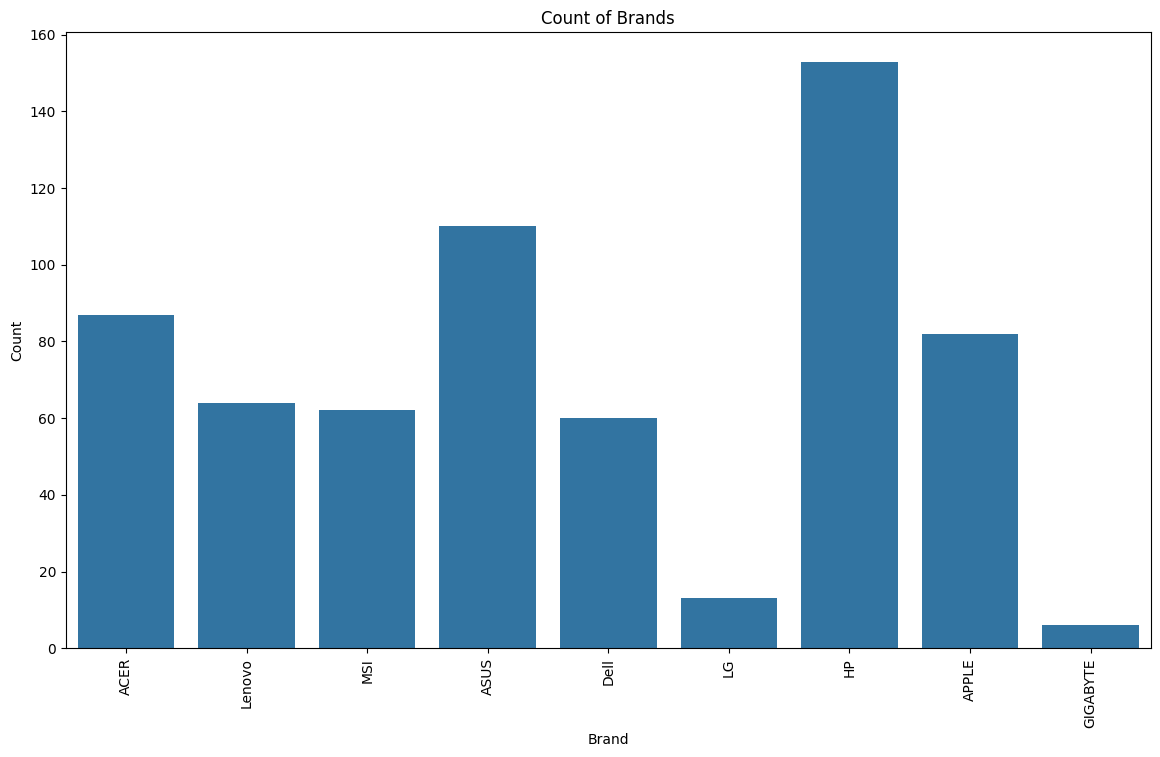

In [15]:
# laptop brand count
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(14, 8))
sns.countplot(x='Thương hiệu', data=use_df)
plt.title('Count of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

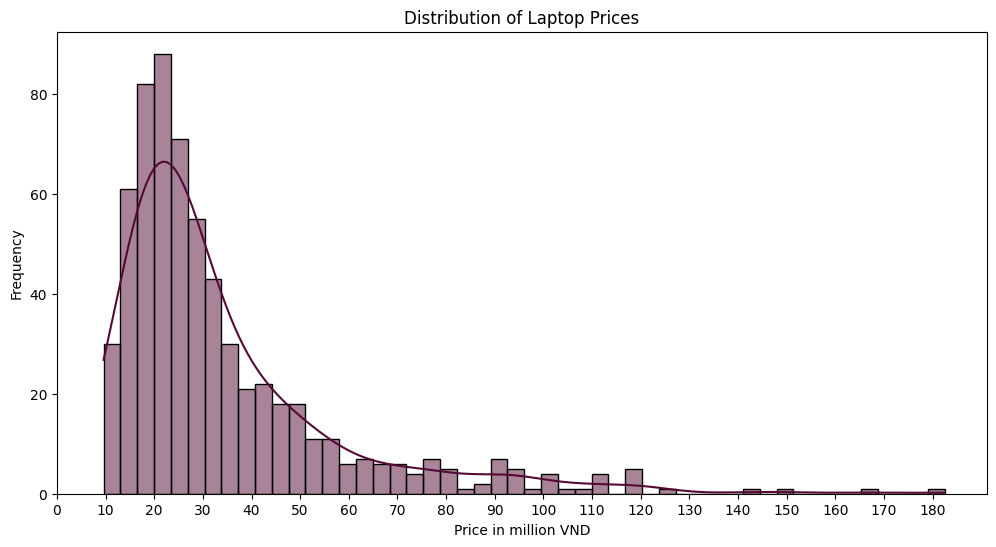

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(use_df['Price']/1000000, bins=50, kde=True, color='#550A35') 
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price in million VND')
plt.ylabel('Frequency')
max_price = (use_df['Price'] / 1000000).max()
plt.xticks(np.arange(0, max_price + 1, step=10)) 
plt.show()

In [17]:
df.head() #Before Transforming

,Product name,Price,Thương hiệu,Bảo hành,CPU,NPU,Chip đồ họa,Màn hình,Webcam,Ram,...,Khối lượng,Chất liệu,Bảo mật,Đèn LED trên máy,Trong hộp có gì,Series laptop,Part-number,Màu sắc,Nhu cầu,Mô tả bảo hành
0,Laptop ACER Swift Go 14 AI SFG14-73-53X7 (Ultr...,22.790.000₫,ACER,12 tháng,Intel® Core™ Ultra 5-125H ( 3.6 GHz - 4.5 GHz ...,Intel® AI Boost NPU,Onboard Intel® Arc™ Graphics,"14"" ( 2880 x 1800 ) 2.8K IPS , 120Hz , không c...",QHD webcam,1 x 16GB LPDDR5x 6400MHz Không nâng cấp được ),...,1.3 kg,Vỏ nhôm,Vân tay,không đèn,Cáp + Sạc,Swift Go,NX.KSLSV.001,Bạc,cơ bản,NaN
1,Laptop ACER Nitro V 16 ProPanel ANV16-41-R36Y ...,30.590.000₫,ACER,12 tháng,AMD Ryzen™ 7 8845HS ( 3.8 GHz - 5.1 GHz / 16MB...,AMD XDNA™ 16 TOPS,GeForce RTX™ 4050 6GB GDDR6 AMD Radeon 780M,"16"" ( 1920 x 1200 ) WUXGA 16:10 , IPS , 165Hz ...",HD webcam,2 x 8GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối ...,...,2.5 kg,Vỏ nhựa,NaN,không đèn,"Adapter, dây nguồn, HDSD,…",Nitro V,NH.QP1SV.004,Đen,Gaming,NaN
2,Laptop Lenovo Legion 5 15IRX9 - 83JJ000FVN (i7...,37.990.000₫,Lenovo,24 tháng,Intel Core i7-13650HX ( 2.6 GHz - 4.9 GHz / 24...,NaN,GeForce RTX™ 4060 8GB GDDR6 Intel® UHD Graphic...,"15.6"" ( 1920 x 1080 ) Full HD IPS , 144Hz , kh...",HD webcam,2 x 12GB DDR5 4800MHz ( 2 Khe cắm / Hỗ trợ tối...,...,2.3 kg,Vỏ nhôm,NaN,không đèn,NaN,Legion,83JJ000FVN,Xám,Gaming,NaN
3,Laptop gaming Lenovo Legion Pro 5 16IRX9 - 83D...,52.990.000₫,Lenovo,24 tháng,Intel® Core™ i9-14900HX ( 2.2 GHz - 5.8 GHz / ...,NaN,GeForce RTX™ 4070 8GB GDDR6 Intel® UHD Graphic...,"16"" ( 2560 x 1600 ) WQXGA IPS , 240Hz , 500 ni...",FHD webcam,2 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,...,2.5 kg,Vỏ nhôm,NaN,NaN,"Adapter, dây nguồn",Legion,83DF0046VN,Xám,Gaming,NaN
4,Laptop gaming Lenovo Legion 5 16IRX9 - 83DG004...,40.990.000₫,Lenovo,24 tháng,Intel® Core™ i7-14650HX ( 2.2 GHz - 5.2 GHz / ...,NaN,GeForce RTX™ 4060 8GB GDDR6 Intel® UHD Graphic...,"16"" ( 2560 x 1600 ) WQXGA IPS , 165Hz , 350 ni...",FHD webcam,1 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,...,2.3 kg,Vỏ nhôm,NaN,NaN,"Adapter, dây nguồn",Legion,83DG004YVN,Xám,Gaming,NaN


In [19]:
use_df.head()

,Product name,Thương hiệu,CPU,NPU,Ram,Webcam,Lưu trữ(GB SSD),Âm thanh,Pin,Nhu cầu,Price
0,Laptop ACER Swift Go 14 AI SFG14-73-53X7 (Ultr...,ACER,Intel® Core™ Ultra 5-125H ( 3.6 GHz - 4.5 GHz ...,Intel® AI Boost NPU,1 x 16GB LPDDR5x 6400MHz Không nâng cấp được ),QHD,512.0,Acer TrueHarmony Technology,65.0,cơ bản,22790000.0
1,Laptop ACER Nitro V 16 ProPanel ANV16-41-R36Y ...,ACER,AMD Ryzen™ 7 8845HS ( 3.8 GHz - 5.1 GHz / 16MB...,AMD XDNA™ 16 TOPS,2 x 8GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối ...,HD,512.0,NaN,57.0,Gaming,30590000.0
2,Laptop Lenovo Legion 5 15IRX9 - 83JJ000FVN (i7...,Lenovo,Intel Core i7-13650HX ( 2.6 GHz - 4.9 GHz / 24...,NaN,2 x 12GB DDR5 4800MHz ( 2 Khe cắm / Hỗ trợ tối...,HD,512.0,Nahimic Audio,60.0,Gaming,37990000.0
3,Laptop gaming Lenovo Legion Pro 5 16IRX9 - 83D...,Lenovo,Intel® Core™ i9-14900HX ( 2.2 GHz - 5.8 GHz / ...,NaN,2 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,FHD,1024.0,Nahimic Audio,NaN,Gaming,52990000.0
4,Laptop gaming Lenovo Legion 5 16IRX9 - 83DG004...,Lenovo,Intel® Core™ i7-14650HX ( 2.2 GHz - 5.2 GHz / ...,NaN,1 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,FHD,512.0,Nahimic Audio,NaN,Gaming,40990000.0


### Standardize column names